# FULL CODE

To know about ANN model with word embedding
choose the below options

 1.adiads Brand reviews 
 2.skechers Brand reviews 
 3.crocs Brand Reviews
Enter number of your choice : 3


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ndhiv\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 235, 20)           100640    
_________________________________________________________________
flatten_1 (Flatten)          (None, 4700)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                75216     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 175,907
Trainable params: 175,907
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8000000
21/21 [==============================] - 1s 34ms/step - loss: 1.1817 - accuracy: 0.4287 - val_loss: 1.2020 - val_accuracy: 0.0725
Epoch 2/8000000
21/21 [==============================] - 0s 20ms/step - loss: 1.0591 - accuracy: 0.4

<IPython.core.display.Javascript object>


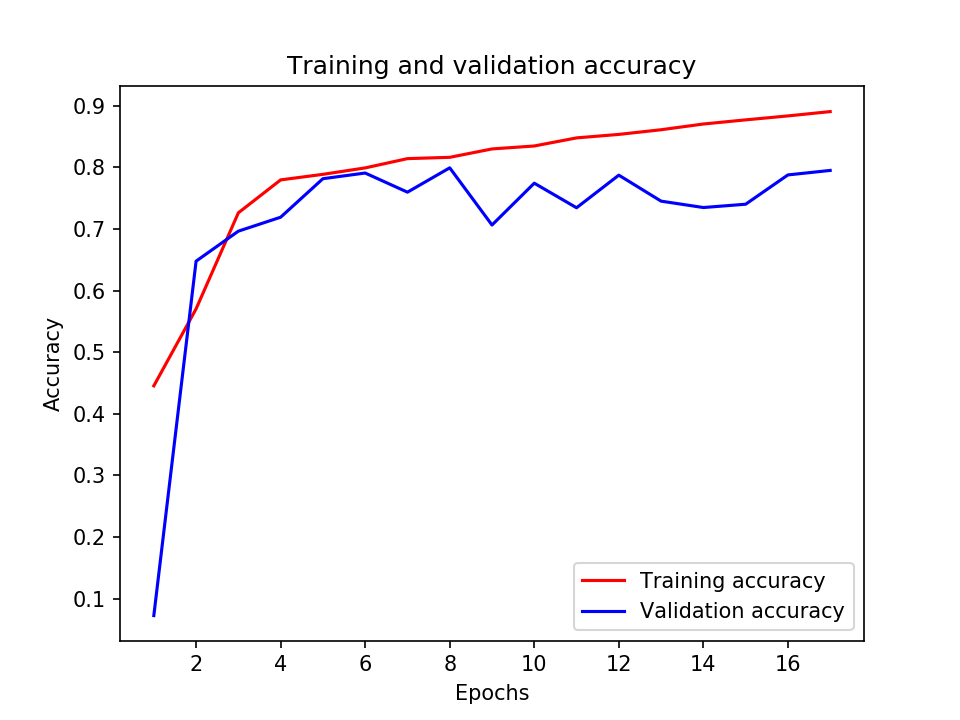

102/102 [==============================] - 0s 964us/step - loss: 0.5881 - accuracy: 0.7874
test accuracy: 0.787423312664032
[[ 104   90   94]
 [  81  168   51]
 [ 272  105 2295]]
              precision    recall  f1-score   support

           0      0.228     0.361     0.279       288
           1      0.463     0.560     0.507       300
           2      0.941     0.859     0.898      2672

    accuracy                          0.787      3260
   macro avg      0.544     0.593     0.561      3260
weighted avg      0.834     0.787     0.807      3260



In [2]:
def load_preprocessing():
    '''preprcessing the data like removing unwanted column,clean the text
    stop word, non-english word removed, tokenized, lemmatized'''
    ## importing the necessary library 
    import pandas as pd
    import datetime
    import seaborn as sns
    import numpy as np
    import warnings
    warnings.filterwarnings("ignore")

    ### reading the data as dataframe
    df = pd.read_excel('shoes.xlsx',sheet_name="Sheet2")

    ### deleting the unwanted column
    del(df["marketplace"])
    del(df["customer_id"])
    del(df["review_id"])
    del(df["product_parent"])
    del(df["vine"])
    del(df["review_headline"])
    del(df["total_votes"])
    del(df["product_category"])
    del(df["product_id"])
    del(df["helpful_votes"])
    del(df["verified_purchase"])

    #### create a brand subset
    df['product_title']=df['product_title'].apply(lambda x: x.lower())

    conditions =[(df['product_title'].str.contains('adidas')),
                (df['product_title'].str.contains('crocs')),
                (df['product_title'].str.contains('skechers'))]
    values=['adidas','crocs','skechers']
    df['Brand']=np.select(conditions,values)


    #### labeling the data using star rating
    df["positivity"] = df["star_rating"].apply(lambda x: 2 if x>3 else(0 if x==3 else 1))

    ### #Text Cleaning
    # 1.1 Define preprocess function
    df["review_body"] = df["review_body"].astype("str")
    import string
    import nltk
    nltk.download('words')
    words = set(nltk.corpus.words.words())
    stopwords = nltk.corpus.stopwords.words('english')
    new_stopwords = ["i've","i'm",'on','ie','thesefor','im']
    stopwords.extend(new_stopwords)
    import re
    wn=nltk.WordNetLemmatizer()


    def removing_punc(ele):
        # Convert the text into lowercase
        ele = ele.lower()
        #punctuation
        ele = re.sub('[%s]' % re.escape(string.punctuation), '', ele)
        # number
        ele = re.sub(r'[0-9]', '', ele)
        #new line
        ele = re.sub('\n', '', ele)
        #white space
        ele= re.sub("^\s+", "", ele)
        return ele
    df["review_body"]=df["review_body"].apply(lambda x: removing_punc(x))


    def tokenize(txt):
        """tokenize each word by using split() function"""
        tokens=re.split('\W+', txt)
        return tokens
    df['tokenized_message']=df['review_body'].apply(lambda x: tokenize(x))

    def clean_word(txt_tokenized):
        """removed the stopword,non-english words and remove the numbers and get the base word using lemmatize function"""
        new_word = [word for word in txt_tokenized if word not in stopwords]
        new_word = [word for word in new_word if word.isalpha()]
        new_word = [word for word in new_word if word in words]
        new_word = [wn.lemmatize(word) for word in new_word]
        return ' '.join(new_word)

    df['st_cleaned_message']=df['tokenized_message'].apply(lambda x:clean_word(x))
    return df

def switch_fun(choice):
    ''' based on brand of shoes the corresponding function calls'''
    if choice == 1:
        df=load_preprocessing()
        a,b,c=adidas(df)
        model_build_fit(a,b,c)       
    elif choice == 2:
        df=load_preprocessing()
        a,b,c=skechers(df)
        model_build_fit(a,b,c)  
        
    elif choice == 3:
        df=load_preprocessing()
        a,b,c=crocs(df)
        model_build_fit(a,b,c)  

    else: 
        unknown_action()
    
def unknown_action():
    '''if the user input is wrong'''
    print('invalid entry')
    print('enter 1 or 2 or 3')
    return 0    
    
def adidas(df):
    '''get the adidas dataset from the whole dataset'''
    ### extracting only the adidas shoe brand reviews from the dataset
    adidas = df[df["Brand"]=="adidas"].sort_values(by=["review_date"], ascending=False)
    ### Removing unwanted column
    del(adidas['product_title'])
    del(adidas['review_body'])
    del(adidas['Brand'])
    del(adidas["review_date"])
    del(adidas['star_rating'])
    del(adidas['tokenized_message'])
    vocab_size = 4156
    max_length = 291
    return adidas,vocab_size,max_length

def skechers(df):
    '''get the skechers dataset from the whole dataset'''
    ### extracting only the skechers shoe brand reviews from the dataset
    skechers = df[df["Brand"]=="skechers"].sort_values(by=["review_date"], ascending=False)
    ### Removing unwanted column
    del(skechers['product_title'])
    del(skechers['review_body'])
    del(skechers['Brand'])
    del(skechers["review_date"])
    del(skechers['star_rating'])
    del(skechers['tokenized_message'])
    vocab_size = 4800
    max_length = 330
    return skechers,vocab_size,max_length

def crocs(df):
    '''get the crocs dataset from the whole dataset'''
    ### extracting only the crocs shoe brand reviews from the dataset
    crocs = df[df["Brand"]=="crocs"].sort_values(by=["review_date"], ascending=False)
    ### Removing unwanted column
    del(crocs['product_title'])
    del(crocs['review_body'])
    del(crocs['review_date'])
    del(crocs['Brand'])
    del(crocs['star_rating'])
    del(crocs['tokenized_message'])
    vocab_size = 5032
    max_length = 235
    return crocs,vocab_size,max_length

def model_build_fit(data1,vocab_size,max_length):    
    ''' Buliding ANN model with word embedding layer'''

    ## importing necessary library to build word embedding in the Artificial neural network
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib notebook
    from tensorflow.keras.preprocessing.text import one_hot
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.layers import Flatten
    from tensorflow.keras.layers import Embedding
    import keras
    from keras.callbacks import EarlyStopping
    import warnings

    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    ## name the y variable as sentiment
    sentiment = np.array(data1['positivity'])
    sentiment

    ## one hot encoding for the words
    encoded_reviews = [one_hot(d, vocab_size) for d in data1['st_cleaned_message']]

    ## padding 
    padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')

    ## define X and y variable
    x=padded_reviews
    y=sentiment
    
    from keras.utils import np_utils
    ## convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(y)

    ## split the dataset as train and test for evalution
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, dummy_y, test_size=0.20, random_state = 42)

    ## import necessary library to add word embedding layer
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Flatten
    from keras.layers.embeddings import Embedding
    embeded_vector_feature = 20
    
    # define the model
    model = Sequential()
    model.add(Embedding(vocab_size, embeded_vector_feature, input_length=max_length))
    model.add(Flatten())
    model.add(Dense(units = 16, kernel_initializer ='he_uniform',  input_dim = (x.shape[1])))
    model.add(Dense(3, activation='softmax'))

    # compile the model
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    # summarize the model
    model.summary()
    
    # early stopping callback
    # This callback will stop the training when there is no improvement in  
    # the validation loss for 5 consecutive epochs.  
    es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                       mode='min',
                                       patience=5, 
                                       restore_best_weights=True) 
    
    from sklearn.utils import class_weight
    class_weights = list(class_weight.compute_class_weight('balanced',
                                             np.unique(data1['positivity']),
                                             data1['positivity']))

    weights={}
    for index, weight in enumerate(class_weights):
        weights[index]=weight
    
    # model fit 
    history = model.fit(x_train,
                        y_train,
                        callbacks=[es],
                        class_weight=weights,
                        epochs=8000000, 
                        batch_size=500,
                        shuffle=True,
                        validation_split=0.20,
                        verbose=1)
    
    history_dict = history.history
    # learning curve
    # accuracy
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    # loss
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    # range of X (no. of epochs)
    epochs = range(1, len(acc) + 1)

    # plot
    # "r" is for "solid red line"
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    ## new data come how the model predict 
    y_test_pred = model.predict_classes(x_test)

    loss, accuracy = model.evaluate(x_test, y_test)
    print('test accuracy:',accuracy)

    from keras.utils import np_utils
    ## convert integers to dummy variables (i.e. one hot encoded)
    dummy_y_pred = np_utils.to_categorical(y_test_pred)

    ### classification report and confusion matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    matrix = confusion_matrix(y_test.argmax(axis=1), dummy_y_pred.argmax(axis=1))
    print(matrix)
    from sklearn.metrics import classification_report
    print(classification_report(y_test.argmax(axis=1),dummy_y_pred.argmax(axis=1), digits=3))
    
print('To know about ANN model with word embedding')
print('choose the below options')
print('\n 1.adiads Brand reviews \n 2.skechers Brand reviews \n 3.crocs Brand Reviews')
try:
    r = int(input("Enter number of your choice : ")) 
except TypeError:
        print("TypeError")
except:
    print('invalid entry')
switch_fun(r)